# The Imitation Game
The imitation game refers to a test for assesing *machine intelligence*, proposed by the British mathematician and computer scientist Alan Turing in 1950.
>
> The test is designed to asses a machine's ability to exhibit intelligent behaviour equivalent to, or indistinguishable from that of a human.<br>

<center><img src="images/imitation_game.png" width="300">

Try this game with ChatGPT/DeepSeek.</center>

# Aritificial Intelligence and Machine Learning

- Aritificial intelligence leverages computers and machines to mimic the problem solving and decision making capabilities of the human mind. <br>
![alt text](images/AI_vs_hum.png "Title")
<br>

## Machine Learning

- Machine learning is more dependent on human intervention to learn. Human experts determines the hierarchy of features to understand the difference between data inputs, usually requiring more structured data to learn.

- **Deep learning** in general does not require that much structuring of data and extract features without much of a human intervention. <br>

<br>

![alt text](images/machine_venn.png "Title")



- In **classical** programming, we the developers need to understand the aspect of the problem we are trying to solve, and to know exactly what all the rules are to make it to the solution

>
> <span style="color:red">**Intuitively**: **Machine Learning** = **Learning from example**</span>.
>

<br>

Example: <span style="color:blue">Distinguish Squares and Circles</span>

![alt text](images/square_circle.png "Title")

<br>

- The standard coding algorithms that we use are constrained by statements like *if*, *do-while*, *for* etc. Even a very intelligent coder can only cover a finite number of scenarios through these.

Example: <span style="color:blue"> Self driving cars </span>

![alt text](images/self_drive.png "Title")

<span style="color:red"> **What if:** There is a human on a wet road and the signal in green?? </span>

> <span style="color:blue"> **Since our real world has infinite possibilities, explicit codings are not faithful or even practical**. </span>

#### Human Brains are amazing can we mimic that??

![alt text](images/brain_compu.png "Title")
<br>

- An individual neuron can either fire or not depending on the level of input stimuli. So mathematically 
one can think of neurons as some function which is zero below a minimum value of input.<br>

![alt text](images/neuron.png "Title")

- Output of a single neuron depends on the output of the neurons that are connected with it,
each with a varied strength of connection. <br>


![alt text](images/neurons.png "Title")


## Neural Networks

- For each neuron, we define three properties
    1. **Weight:** between each two connected neurons weight defines what is the importance of the previous neuron to the next one.
    2. **Bias:** Offset or bias is a intrinsic property/parameter of each of the neuron.
    3. **Activation function:** Input of each neuron is defined as the weighted sum $z=\sum_j w_j y_j +b$. If the activation function is $f$ for the neuron then output would be $f(z)$.


<center><img src="images/neuron_prop.png" width="500"></center>


- Connecting different artificial neurons like this together generates a neural network

<center><img src="images/nnetwork.png" width="500"></center>



### Implementation

There are several popular python packages for implementing neural networks like **Tensorflow**, **Pytorch** etc. In this course we will only focus on **Pytorch**. In all the packages, the core ideas remains the same

1. **Feed-Forward**
    - For each layer the input $a$ ($a=x$ for the first layer) is multiplied by weights $W$, added to biases $b$, then passed through as activation function $f$. Therefore, for the $l^{th}$ layer and $i^{th}$ neuron we have the output
    $$
    z^{l}_i = \sum_{j=1}^{h_l} f(w^{(l,l-1)}_{ij}z^{l-1}_j+b_i^{l})
    $$
    where $h_l$ is the number of hidden nodes at the $l^{th}$ layer. Note that here we are using $h_0=len(x)$.
    - Note that here the network/model parameters $\theta$ includes all weights and biases as a whole.
    - Output propagates from input layer through hidden layers to the output.

2. **Back-Propagation**
    - Compute loss $\mathcal{L}(\hat{y},y;\theta)$ where $\hat{y}$ is the network output and $y$ is the true output.
    - Use the chain rule to compute $\frac{\partial \mathcal{L}}{\partial W_{ij}^{(l,l-1)}}$ and $\frac{\partial \mathcal{L}}{\partial b_i^{l}}$ for each layer $l$, propagating the error backward.

3. **Gradient Descent**
    - Update each parameter $\theta \in {w,b}$ by
    $$
    \theta \leftarrow \theta - \alpha \frac{\partial \mathcal{L}}{\partial \theta}
    $$
    where $\alpha$ is the learning rate.


### Using PyTorch

We will now learn implementing the above steps in PyTorch by fitting a simple dataset where 
$$
y= 0.1 x^3 - 0.5 x^2 + 2 \sin(3x),\quad x \in [-2,2]
$$
First we plot the “ground truth” curve we want our network to learn. No noise—this is a deterministic regression task.
Then we convert our *NumPy* arrays into PyTorch tensors and wrap them in a **DataLoader** so we can batch them during training.

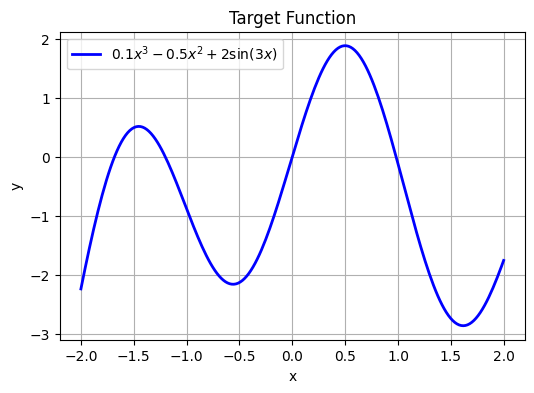

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 200 points in [-2,2]
X_np = np.linspace(-2, 2, 200).reshape(-1,1)
# Define f(x) = 0.1 x^3 - 0.5 x^2 + 2 sin(3x)
Y_np = 0.1*X_np**3 - 0.5*X_np**2 + 2*np.sin(3*X_np)

# Plot the true function
plt.figure(figsize=(6,4))
plt.plot(X_np, Y_np, 'b-', linewidth=2,
         label=r'$0.1x^3 -0.5x^2 +2\sin(3x)$')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Target Function')
plt.legend(); plt.grid(True)
plt.show()



In [2]:
# Convert to PyTorch tensors & DataLoader

import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to float32 tensors
X = torch.from_numpy(X_np).float()  # shape (200,1)
Y = torch.from_numpy(Y_np).float()  # shape (200,1)

# Create a 80/20 train/validation split
dataset = TensorDataset(X, Y)
val_size   = int(0.2 * len(dataset))
train_set, val_set = torch.utils.data.random_split(
    dataset, [len(dataset)-val_size, val_size]
)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=32)


#### Defining the Model

We define a simple feed‐forward network SimpleNet with one hidden layer of size $32$ and *ReLU* activation.

In [3]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)


We must choose a learning rate, decide how many epochs to train, and pick an optimizer. We’ll use plain stochastic gradient descent (SGD) here, but you can swap in Adam or others.

In [4]:
# Hyper-parameters
learning_rate = 1e-2
num_epochs    = 100


For regression, we commonly use mean squared error (MSE). We instantiate nn.MSELoss(). For parameter updates, we pass our model’s parameters and the learning rate to an optimizer, here **torch.optim.SGD**.

In [5]:
model     = SimpleNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


Each epoch, we iterate over mini-batches from our DataLoader. For each batch we:

1. Zero out any stored gradients.

2. Run a forward pass to compute predictions.

3. Compute loss against true y.

4. Call loss.backward() to back-propagate gradients.

5. Call optimizer.step() to update weights.

We’ll also track and plot training vs. validation loss for diagnosing over-/under-fitting. To illustrate everything together, we create a helper train_and_plot that takes any model instance, trains it for a given number of epochs and learning rate, then plots:

1. Training loss curve

2. Final prediction curve vs noisy data and true $\sin(x)$.

In [6]:
def train_and_evaluate(model, epochs, lr, early_stop=False, patience=5):
    """
    Trains `model` for up to `epochs` with LR `lr`.
    If `early_stop=True`, monitors validation loss and stops after `patience` non-improving epochs.
    Always reloads the best model before plotting.
    """
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses, val_losses = [], []
    best_val = float('inf')
    best_epoch = 0
    wait = 0

    for epoch in range(1, epochs + 1):
        # — Training —
        model.train()
        running_train = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
            running_train += loss.item() * xb.size(0)
        train_losses.append(running_train / len(train_loader.dataset))

        # — Validation —
        model.eval()
        running_val = 0.0
        with torch.no_grad():
            for xb, yb in val_loader:
                running_val += criterion(model(xb), yb).item() * xb.size(0)
        val_loss = running_val / len(val_loader.dataset)
        val_losses.append(val_loss)

        # — Check for improvement —
        if val_loss < best_val:
            best_val = val_loss
            best_epoch = epoch
            wait = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            wait += 1
            if early_stop and wait >= patience:
                print(f"→ Early stopping at epoch {epoch} (best at {best_epoch})")
                break

    # Reload the best‐seen weights
    model.load_state_dict(torch.load('best_model.pt'))

    # — Plot Loss Curves —
    plt.figure(figsize=(6,3))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses,   label='Val   Loss')
    if early_stop:
        plt.axvline(best_epoch, color='red', linestyle='--',
                    label=f'Best Epoch {best_epoch}')
    plt.title('Loss Curves')
    plt.xlabel('Epoch'); plt.ylabel('MSE')
    plt.legend(); plt.grid(True)
    plt.show()

    # — Plot Final Fit —
    with torch.no_grad():
        preds = model(X).numpy()
    plt.figure(figsize=(6,4))
    plt.scatter(X_np, Y_np, s=10, label='True samples')
    plt.plot(X_np, preds, 'r-', label='Model prediction')
    plt.xlabel('x'); plt.ylabel('y')
    plt.title('Final Model Fit')
    plt.legend(); plt.grid(True)
    plt.show()

    #return best_epoch


#### Over-fitting vs Under-fitting
- **Under-fitting** occurs when both training and validation error remain high-- *your model is too simple*.

- **Over-fitting** occurs when training error is low but validation error rises —- *your model is too complex or trained too long*.

##### Illustrating Under-fitting

Train with only 5 epochs—the network hasn’t had enough time to capture the sine pattern.

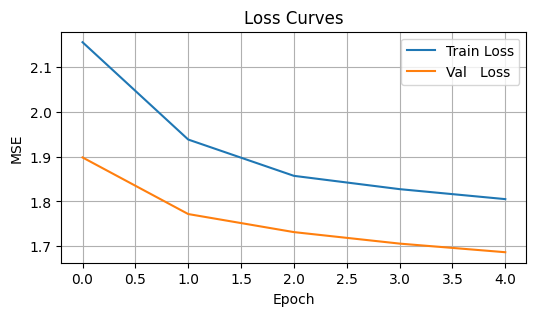

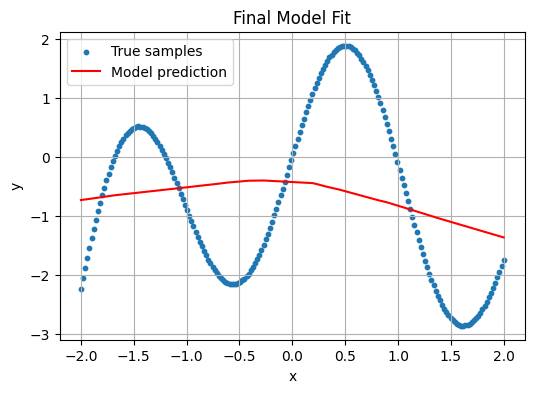

In [7]:
model_under = SimpleNet()
train_and_evaluate(model_under,
                   epochs=5,      # very few epochs
                   lr=1e-2,
                   early_stop=False)


- **Observation:** The training loss remains relatively high, and the red prediction curve is too flat or linear.

##### Illustrating Over-fitting

Increase capacity to 512 hidden units and train for 500 epochs—the model will “memorize” evrything.

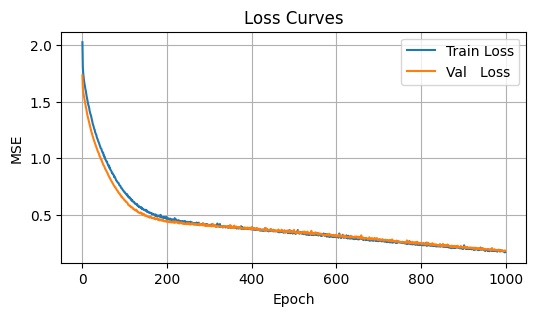

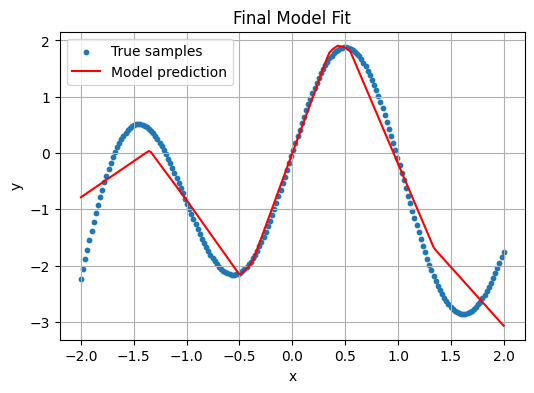

In [8]:
# Increase capacity: 1→512→1 network
class LargeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
    def forward(self, x):
        return self.net(x)

model_over = SimpleNet()
train_and_evaluate(model_over,
                   epochs=1000,
                   lr=1e-2,
                   early_stop=False)



- **Observation:** Training loss drops near zero, but the final fit oscillates wildly, chasing every noisy point. It **over-fits** the deterministic function’s high-frequency component.

#### Adding Early Stopping

Finally, we demonstrate early stopping on the large model: we’ll monitor validation loss and halt training if it fails to improve for 10 consecutive epochs.

→ Early stopping at epoch 626 (best at 606)


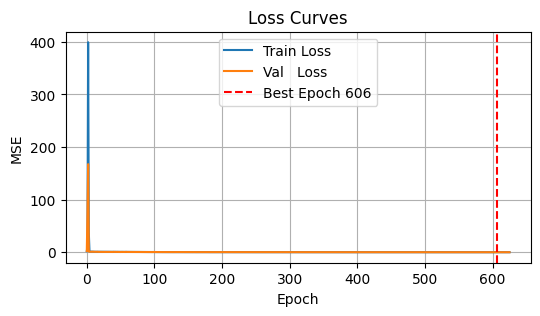

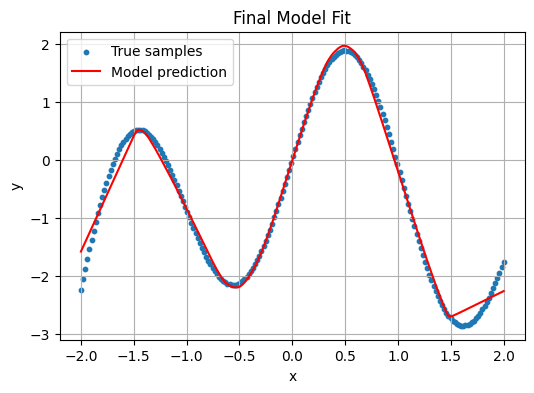

In [11]:
model_es = LargeNet()
stop_epoch = train_and_evaluate(model_es,
                                epochs=1000,
                                lr=1e-2,
                                early_stop=True,
                                patience=20)


## Finding $\pi$

### The Classic approach

Before trying with machine learning, let us first use the Monte Carlo method for estimating $\pi$. The concept is simple: imagine randomly tossing darts at a dartboard mounted to a square. Then, $\pi$ can be approximated by four times the number of darts hitting the dartboard divided by the total number of darts thrown.

> The ratio of a circle’s area ($\pi r^2$) with that to the area of a square ($4 r^2$) is $\frac{\pi}{4}$. With a unit circle, we measure the fraction $\frac{\pi}{4}$ through randomness.

Estimated value of PI: 3.18


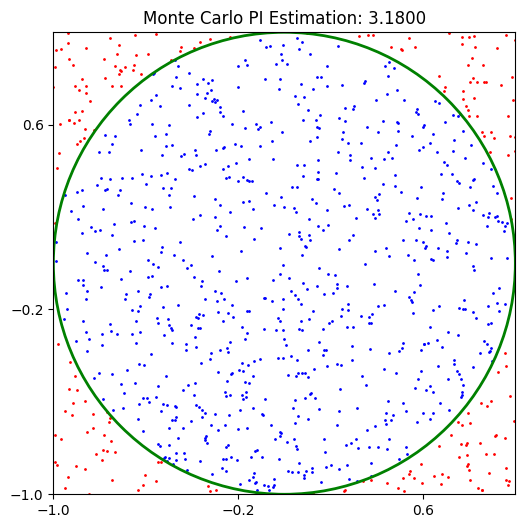

In [24]:
import matplotlib.pyplot as plt

# Number of random points
N = 1000

# Generate random points in the square [-1, 1] x [-1, 1]
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)


# Determine which points are inside the circle
circled = x**2 + y**2 <= 1

# Estimate PI: fraction of points inside the circle times four
pi_val = 4 * np.sum(circled) / N

print(f"Estimated value of PI: {pi_val}")

# Plotting
plt.figure(figsize=(6,6))

# Points inside the circle in blue
plt.scatter(x[circled], y[circled], color='blue', s=1, label='Inside Circle')
# Points outside the circle in red
plt.scatter(x[~circled], y[~circled], color='red', s=1, label='Outside Circle')

# Draw the circle outline for reference
circle = plt.Circle((0, 0), 1, color='green', fill=False, linewidth=2, label='Circle')

plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Monte Carlo PI Estimation: {pi_val:.4f}")
# Set ticks to be in increments of 0.8
plt.xticks(np.arange(-1, 1.1, 0.8))
plt.yticks(np.arange(-1, 1.1, 0.8))
plt.show()

### The machine Learning approach

Let us first call the usual libraries for compilation

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, random_split

# For reproducibility
np.random.seed(42)
torch.manual_seed(42)

- **Main Strategy:** Remember that machine learning is basically learning by example. So in this case we first generate random points on the square and label them as $1$ or $0$ depending on wheather or not the points are inside the circle.

In [38]:
# Generate data
N = 100000
X_data = np.random.uniform(-1, 1, (N, 2)).astype(np.float32)
y_data = ((X_data[:, 0]**2 + X_data[:, 1]**2) <= 1).astype(np.float32) # denote the label of the point whether it is inside the circle or not

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_data)
y_tensor = torch.tensor(y_data).unsqueeze(1)

# Split into training and validation sets (80/20). For most of the cases this is the standard split
val_size = int(0.2 * N)
train_size = N - val_size
dataset = TensorDataset(X_tensor, y_tensor)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024)

- Next step is to define the network or model.

In [39]:
# Define the model

class PiNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = PiNet()


- Setting up the hyper parameters and other helpers.

In [40]:
# Training setup
criterion = nn.BCELoss() # This is the Binary Cross Entropy loss function, specially used when the target is either 0 or 1.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 200
patience = 15


# For tracking
pi_history = []
val_loss_history = []
decision_boundary_snapshots = []


In [41]:
# Helper functions for estimating PI and plot decision boundary

def estimate_pi(model, val_loader):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for xb, _ in val_loader:
            preds = model(xb) > 0.5
            all_preds.append(preds)
    return 4 * torch.cat(all_preds).float().mean().item()

def plot_decision_boundary(model, epoch):
    model.eval()
    grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
    grid_points = torch.tensor(np.c_[grid_x.ravel(), grid_y.ravel()], dtype=torch.float32)
    
    with torch.no_grad():
        preds = model(grid_points).numpy().reshape(grid_x.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(grid_x, grid_y, preds, levels=[0, 0.5, 1], alpha=0.3, colors=['red', 'blue'])
    
    X_val_np = val_dataset[:][0].numpy()
    y_val_np = val_dataset[:][1].numpy()
    plt.scatter(X_val_np[y_val_np[:, 0]==1][:, 0], X_val_np[y_val_np[:, 0]==1][:, 1], s=1, c='blue')
    plt.scatter(X_val_np[y_val_np[:, 0]==0][:, 0], X_val_np[y_val_np[:, 0]==0][:, 1], s=1, c='red')
    plt.title(f"Epoch {epoch+1}: Decision Boundary (π ≈ {pi_history[-1]:.6f})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.grid(True)
    plt.show()


- Let us now train the piNet

Epoch 10: Val Loss = 0.0105, π ≈ 3.138000
Epoch 20: Val Loss = 0.0203, π ≈ 3.166400
Epoch 30: Val Loss = 0.0091, π ≈ 3.135000


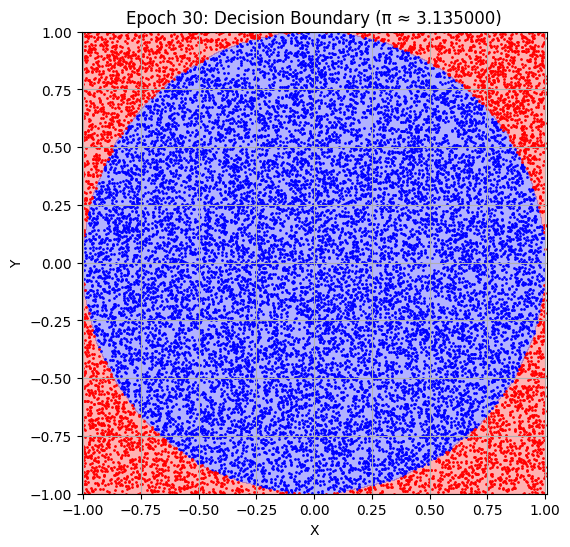

Epoch 40: Val Loss = 0.0137, π ≈ 3.158400
Early stopping!


In [44]:
# Train loop with visual updates
epochs = 300
patience = 12
best_val_loss = float('inf')
best_epoch = 0
wait = 0

for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            val_loss += criterion(model(xb), yb).item()
    val_loss /= len(val_loader)
    val_loss_history.append(val_loss)

    pi_est = estimate_pi(model, val_loader)
    pi_history.append(pi_est)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Val Loss = {val_loss:.4f}, π ≈ {pi_est:.6f}")

    # Update best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        best_model_state = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping!")
            break

    # Plot every 10 epochs
    if (epoch + 1) % 30 == 0:
        plot_decision_boundary(model, epoch)


- **Final Plot:**  As the early stopping has occured now we can plot the best trained network, which is saved during training and see the estimate of $\pi$.


Best result at epoch 30: π ≈ 3.142200 (val_loss: 0.016775)


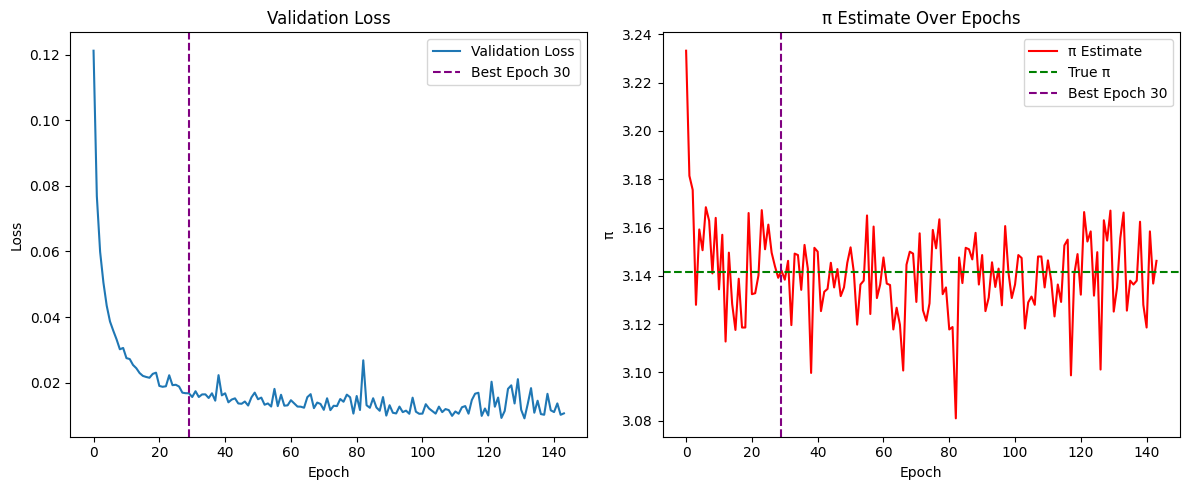

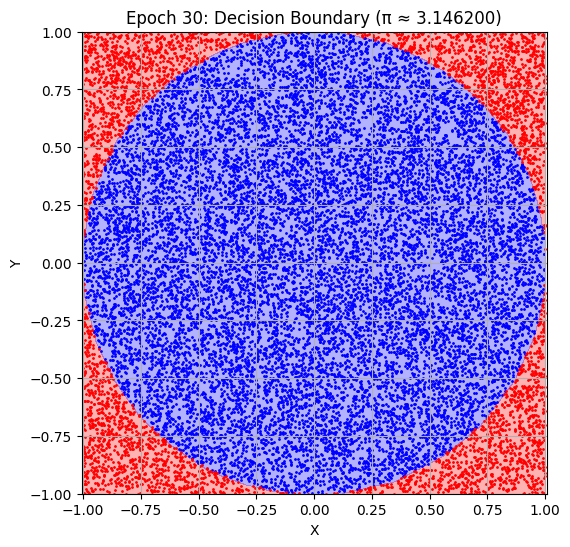

In [45]:
# Final plots after training
model.load_state_dict(best_model_state) # This is the best model saved by the early stopping 
print(f"\nBest result at epoch {best_epoch+1}: π ≈ {pi_history[best_epoch]:.6f} (val_loss: {val_loss_history[best_epoch]:.6f})")

# Plot loss and π estimate history
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(val_loss_history, label="Validation Loss")
plt.axvline(x=best_epoch, color='purple', linestyle='--', label=f'Best Epoch {best_epoch+1}')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation Loss")

# π Estimate
plt.subplot(1, 2, 2)
plt.plot(pi_history, color='red', label="π Estimate")
plt.axhline(y=np.pi, color='green', linestyle='--', label="True π")
plt.axvline(x=best_epoch, color='purple', linestyle='--', label=f'Best Epoch {best_epoch+1}')
plt.xlabel("Epoch")
plt.ylabel("π")
plt.legend()
plt.title("π Estimate Over Epochs")

plt.tight_layout()
plt.show()

# Final decision boundary
plot_decision_boundary(model, best_epoch)


## What Next?

So far we have only discussed about **Supervised models**. Supervised learning involves training a model on a labeled dataset, meaning each input comes with the correct output. The goal is for the model to learn to predict these labels on new, unseen data.

- **Pros:**
    - High accuracy when enough labeled data is available.

    - Predictable performance and easier to evaluate.

    - Well-supported with mature libraries.

- **Cons:**
    - Requires large, clean labeled datasets (can be expensive/time-consuming to produce).

    - May overfit if not enough data or too complex a model.

#### Unsupervised models
Unsupervised learning works with unlabeled data. The model tries to discover hidden patterns or structures in the data.

- **Examples:** Clustering customers into groups based on purchasing behavior — the model finds structure without being told what group each customer belongs to. Another interesting example is of the **autoencoder**.

- **Pros:**
    - Works without labeled data.

    - Helps with data exploration, dimensionality reduction, and pattern discovery.

- **Cons:**
    - Hard to evaluate the model (no ground truth).

    - May find patterns that are not meaningful or useful.

    - Often requires strong assumptions about data structure.

#### Reinforcement Learning
Reinforcement learning is based on an agent interacting with an environment. The agent learns through trial and error, receiving rewards or penalties for actions it takes.

- **Example:** Training a robot to walk or a program to play chess — it learns strategies that maximize short or long-term reward.

- **Pros:**
    - Excellent for sequential decision-making and control tasks.

    - Learns directly from interaction without needing labeled datasets.

- **Cons:**
    - Often slow and computationally expensive.

    - May require a lot of exploration or simulation before learning effectively.

    - Sensitive to the choice of reward structure.